Q:

> 1. what is the instance? A person? one person's record? if a person, how to drop/concatnate notes(several records)? how to label (w.r.t death_time)? 
> 2. filtering on age like what others do?

##### for admissions
> 1. How specific time you need? 
> 2. should is error be filtered?
> 3. there is no description towards storetime, what should be included?

##### for notes event
> 1. only keep notes?

### Overall

In [121]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df_2=pd.read_csv('/Users/leilei/Documents/DS1011Project/ADMISSIONS.csv')
df=pd.read_csv('/Users/leilei/Documents/DS1011Project/NOTEEVENTS.csv')

In [12]:
#noteevent
df.shape

(2083180, 11)

In [11]:
#admissions
df_2.shape

(58976, 19)

In [14]:
#notevent
len(df['SUBJECT_ID'].unique())

46146

In [60]:
#admissions
len(df_2['SUBJECT_ID'].unique()),df_2[df_2['HAS_CHARTEVENTS_DATA']==1].shape
#but this might include multiple records for the same person, and one person, one time corresponding to different notes

(46520, (57384, 20))

## Admissions
##### 1. Missing Value

In [46]:
for i in df_2.columns:
    print(i+' The number of missing is {}'.format(len(df_2[df_2[i].isnull()])))

ROW_ID The number of missing is 0
SUBJECT_ID The number of missing is 0
HADM_ID The number of missing is 0
ADMITTIME The number of missing is 0
DISCHTIME The number of missing is 0
DEATHTIME The number of missing is 53122
ADMISSION_TYPE The number of missing is 0
ADMISSION_LOCATION The number of missing is 0
DISCHARGE_LOCATION The number of missing is 0
INSURANCE The number of missing is 0
LANGUAGE The number of missing is 25332
RELIGION The number of missing is 458
MARITAL_STATUS The number of missing is 10128
ETHNICITY The number of missing is 0
EDREGTIME The number of missing is 28099
EDOUTTIME The number of missing is 28099
DIAGNOSIS The number of missing is 25
HOSPITAL_EXPIRE_FLAG The number of missing is 0
HAS_CHARTEVENTS_DATA The number of missing is 0


##### 2. Admission Type

In [15]:
df_2['ADMISSION_TYPE'].value_counts()

EMERGENCY    42071
NEWBORN       7863
ELECTIVE      7706
URGENT        1336
Name: ADMISSION_TYPE, dtype: int64

##### 3. Time Duration

In [48]:
#change to time
df_2['ADMITTIME']=df_2['ADMITTIME'].map(lambda x: parser.parse(x))
df_2['DISCHTIME']=df_2['DISCHTIME'].map(lambda x: parser.parse(x))
df_2['time_differ']=df_2.apply(lambda x: x['DISCHTIME']-x['ADMITTIME'],axis=1)
df_2['time_differ_date']=df_2['time_differ'].apply(lambda x: x.days)

In [67]:
max(df_2['time_differ_date'])

294

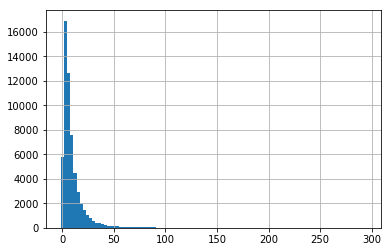

In [75]:
df_2['time_differ_date'].hist(bins=100)
plt.show()

In [56]:
#admissions
df_2.head(10)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,time_differ
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1,1 days 03:28:00
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,5 days 11:55:00
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1,6 days 18:26:00
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1,2 days 20:34:00
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1,3 days 12:49:00
5,26,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,V-TACH,0,1,6 days 23:44:00
6,27,27,134931,2191-11-30 22:16:00,2191-12-03 14:45:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,NaN,WHITE,NaN,NaN,NEWBORN,0,1,2 days 16:29:00
7,28,28,162569,2177-09-01 07:15:00,2177-09-06 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,5 days 08:45:00
8,29,30,104557,2172-10-14 14:17:00,2172-10-19 14:37:00,NaN,URGENT,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,UNKNOWN/NOT SPECIFIED,NaN,NaN,UNSTABLE ANGINA\CATH,0,1,5 days 00:20:00
9,30,31,128652,2108-08-22 23:27:00,2108-08-30 15:00:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,STATUS EPILEPTICUS,1,1,7 days 15:33:00


##### 4. How many has notes

In [76]:
df_notes=df_2[df_2['HAS_CHARTEVENTS_DATA']==1]

In [79]:
df_notes.shape, len(df_notes['SUBJECT_ID'].unique())
#>46146, which is the unique id in notes event. some people's note is not there

((57384, 21), 46448)

##### 5.time is consistent

In [44]:
#tho time is not encoded in the real way, it is consistent in the two forms
df_2[df_2['SUBJECT_ID']==23]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1


In [45]:
df[df['SUBJECT_ID']==23]

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
4324,4310,23,152223.0,2153-09-08,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2153-9-3**] D...
4325,4311,23,124321.0,2157-10-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2157-10-18**] ...
109208,125621,23,124321.0,2157-10-19,NaN,NaN,ECG,Report,NaN,NaN,Sinus bradycardia. Left anterior fascicular bl...
109209,125622,23,NaN,2157-09-29,NaN,NaN,ECG,Report,NaN,NaN,Sinus rhythm. Left atrial abnormality. Right...
109210,125623,23,152223.0,2153-09-04,NaN,NaN,ECG,Report,NaN,NaN,Sinus rhythm\nMarked left axis deviation\nRBBB...
109211,125624,23,152223.0,2153-09-03,NaN,NaN,ECG,Report,NaN,NaN,Sinus rhythm\nSupraventricular extrasystoles\n...
109212,125625,23,152223.0,2153-09-03,NaN,NaN,ECG,Report,NaN,NaN,Sinus rhythm\nMarked left axis deviation\nRBBB...
109213,125626,23,152223.0,2153-09-03,NaN,NaN,ECG,Report,NaN,NaN,Sinus arrhythmia\nLeft axis deviation\nIV cond...
391091,388332,23,124321.0,2157-10-21,2157-10-21 18:46:00,2157-10-21 18:46:10,Nursing,Nursing Progress Note,16978.0,NaN,"78 year old, pleasant male. Resection of know..."
391168,388409,23,124321.0,2157-10-22,2157-10-22 13:01:00,2157-10-22 15:52:46,Nursing,Nursing Transfer Note,19907.0,NaN,"HPI:\n 75yo RHM with CAD s/p CABG x4, AS, HT..."


##### 6. what deathtime is about?

In [87]:
df_death=df_2[df_2['DEATHTIME'].notnull()]
df_death['DEATHTIME']=df_death['DEATHTIME'].map(lambda x: parser.parse(x))
df_death.shape

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


(5854, 21)

In [88]:
df_death[df_death['DEATHTIME']==df_death['DISCHTIME']].shape

(5789, 21)

##### problem

In [111]:
df_2['DISCHARGE_LOCATION'].value_counts()

HOME                         18962
HOME HEALTH CARE             13963
SNF                           7705
REHAB/DISTINCT PART HOSP      6429
DEAD/EXPIRED                  5854
LONG TERM CARE HOSPITAL       2305
SHORT TERM HOSPITAL           1534
DISC-TRAN CANCER/CHLDRN H      669
DISCH-TRAN TO PSYCH HOSP       446
HOSPICE-HOME                   402
LEFT AGAINST MEDICAL ADVI      365
HOSPICE-MEDICAL FACILITY       153
HOME WITH HOME IV PROVIDR       67
OTHER FACILITY                  63
ICF                             47
DISC-TRAN TO FEDERAL HC         11
SNF-MEDICAID ONLY CERTIF         1
Name: DISCHARGE_LOCATION, dtype: int64

In [110]:
df_2[df_2['SUBJECT_ID']==11903]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,time_differ,time_differ_date
12411,14636,11903,137399,2157-08-25 19:50:00,2157-08-25 07:26:00,2157-08-25 07:26:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,...,NaN,NaN,UNKNOWN/NOT SPECIFIED,2157-08-25 18:12:00,2157-08-25 19:44:00,S/P FALL,1,1,-1 days +11:36:00,-1


In [108]:
df[df['SUBJECT_ID']==92001]

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
40860,35199,92001,150299.0,2191-09-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2191-9-25**] ...
415554,421310,92001,150299.0,2191-09-25,2191-09-25 11:46:00,2191-09-25 13:25:19,Physician,MICU Resident Admission Note,19697.0,NaN,TITLE: MICU RESIDENT ADMISSION NOTE\n .\n ...
423549,421305,92001,150299.0,2191-09-25,2191-09-25 13:09:00,2191-09-25 13:09:22,Nursing,Nursing Progress Note,15564.0,NaN,Pt received from EW intubated & sedated on pro...
423600,421294,92001,150299.0,2191-09-25,2191-09-25 11:46:00,2191-09-25 11:46:53,Physician,MICU Resident Admission Note,18697.0,NaN,TITLE: MICU RESIDENT ADMISSION NOTE\n .\n ...
1039847,1042055,92001,150299.0,2191-09-25,2191-09-25 05:40:00,NaN,Radiology,CHEST (PORTABLE AP),NaN,NaN,[**2191-9-25**] 5:40 AM\n CHEST (PORTABLE AP);...
1040039,1042056,92001,150299.0,2191-09-25,2191-09-25 05:40:00,NaN,Radiology,CHEST (PORTABLE AP),NaN,NaN,"[**Last Name (LF) 5292**],[**First Name3 (LF) ..."
1040410,1042050,92001,150299.0,2191-09-25,2191-09-25 03:50:00,NaN,Radiology,CT HEAD W/O CONTRAST,NaN,NaN,[**2191-9-25**] 3:50 AM\n CT HEAD W/O CONTRAST...
1040581,1042051,92001,150299.0,2191-09-25,2191-09-25 03:51:00,NaN,Radiology,CT C-SPINE W/O CONTRAST,NaN,NaN,[**2191-9-25**] 3:51 AM\n CT C-SPINE W/O CONTR...
1041075,1042036,92001,150299.0,2191-09-25,2191-09-25 03:25:00,NaN,Radiology,TRAUMA #3 (PORT CHEST ONLY),NaN,NaN,[**2191-9-25**] 3:25 AM\n TRAUMA #3 (PORT CHES...


In [102]:
df_death[df_death['DEATHTIME']!=df_death['DISCHTIME']]['SUBJECT_ID'].unique().shape

(65,)

### Three cases where discharge time is not equal to death time:
1. The first admission record corresponding to death and the correct time is the same.(id=937)
<br>
2. The kth(k>=2) admission record corresponding to death and the correct time is after, and probably not corresponding with any records.(id=8697)
<br>
3. Only one record and death time is before admit time (id=6800)

In [104]:
df_death[df_death['SUBJECT_ID']==937]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,time_differ,time_differ_date
675,1162,937,148592,2163-01-20 18:39:00,2163-01-24 08:00:00,2163-01-26 08:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,...,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,INTRACRANIAL HEMORRHAGE,1,1,3 days 13:21:00,3
676,1163,937,177274,2163-01-24 09:29:00,2163-01-26 03:45:00,2163-01-26 03:45:00,EMERGENCY,PHYS REFERRAL/NORMAL DELI,DEAD/EXPIRED,Private,...,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,ORGAN DONOR ACCOUNT,1,1,1 days 18:16:00,1


In [92]:
df_death[df_death['SUBJECT_ID']==8697]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,time_differ,time_differ_date
9002,10630,8697,121838,2119-06-08 05:39:00,2119-06-08 12:00:00,2119-06-08 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Government,...,NOT SPECIFIED,SINGLE,WHITE,2119-06-08 04:50:00,2119-06-08 06:11:00,S/P GUN SHOT WOUND,1,1,0 days 06:21:00,0
9003,10631,8697,117100,2119-06-08 15:23:00,2119-06-11 14:14:00,2119-06-08 14:14:00,URGENT,PHYS REFERRAL/NORMAL DELI,DEAD/EXPIRED,Private,...,NOT SPECIFIED,SINGLE,WHITE,NaN,NaN,DONOR ACCOUNT,1,1,2 days 22:51:00,2


In [113]:
df_death[df_death['SUBJECT_ID']==9010]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,time_differ,time_differ_date
12548,11018,9010,129762,2117-11-26 17:27:00,2117-11-26 12:00:00,2117-11-26 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,...,JEWISH,MARRIED,WHITE,NaN,NaN,MASSIVE CEREBRAL HEMORRHAGE,1,1,-1 days +18:33:00,-1


In [107]:
df_2[df_2['SUBJECT_ID']==6800]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,time_differ,time_differ_date
9635,8265,6800,142356,2177-12-29 21:33:00,2178-01-01 19:41:00,2177-12-01 19:41:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,...,NOT SPECIFIED,DIVORCED,WHITE,2177-12-29 15:57:00,2177-12-30 02:36:00,HEPATIC ENCEPHALOPATHY,1,1,2 days 22:08:00,2


In [90]:
#we believe there would not be cases where:
#1. discharge and death time are the same but two different options
#some are dead before they are sent to the hospital, for those, they might have two records but donno what it means
df_death[df_death['DEATHTIME']!=df_death['DISCHTIME']]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,time_differ,time_differ_date
675,1162,937,148592,2163-01-20 18:39:00,2163-01-24 08:00:00,2163-01-26 08:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,...,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,INTRACRANIAL HEMORRHAGE,1,1,3 days 13:21:00,3
6361,6427,5282,165508,2110-02-24 11:34:00,2110-04-01 08:00:00,2110-04-04 08:00:00,EMERGENCY,TRANSFER FROM SKILLED NUR,DEAD/EXPIRED,Medicare,...,JEWISH,SINGLE,WHITE,NaN,NaN,SMALL BOWEL OBSTRUCTION,1,1,35 days 20:26:00,35
6864,6945,5707,168443,2196-09-27 14:40:00,2196-09-28 12:00:00,2196-09-29 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,...,UNOBTAINABLE,MARRIED,WHITE,NaN,NaN,S/P BICYCLE/CAR CRASH,1,1,0 days 21:20:00,0
7056,5027,4139,107944,2175-11-29 17:11:00,2175-11-30 14:00:00,2175-12-01 14:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,...,OTHER,NaN,WHITE,NaN,NaN,SEVER HEAD INJURY,1,1,0 days 20:49:00,0
8578,8410,6912,143307,2196-08-31 21:50:00,2196-09-08 08:00:00,2196-09-09 08:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicaid,...,NOT SPECIFIED,MARRIED,WHITE,2196-08-31 18:24:00,2196-08-31 21:58:00,CARDIAC ARREST,1,1,7 days 10:10:00,7
9003,10631,8697,117100,2119-06-08 15:23:00,2119-06-11 14:14:00,2119-06-08 14:14:00,URGENT,PHYS REFERRAL/NORMAL DELI,DEAD/EXPIRED,Private,...,NOT SPECIFIED,SINGLE,WHITE,NaN,NaN,DONOR ACCOUNT,1,1,2 days 22:51:00,2
9029,12091,9883,185217,2150-08-13 13:56:00,2150-08-15 07:35:00,2150-08-14 07:35:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,...,JEWISH,MARRIED,WHITE,2150-08-13 07:29:00,2150-08-13 14:09:00,SEPSIS,1,1,1 days 17:39:00,1
9048,12110,9896,165450,2131-02-10 00:09:00,2131-02-11 14:45:00,2131-02-12 14:45:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,...,CATHOLIC,NaN,WHITE,2131-02-09 16:52:00,2131-02-10 02:00:00,INTRACRANIAL HEMORRHAGE,1,1,1 days 14:36:00,1
9635,8265,6800,142356,2177-12-29 21:33:00,2178-01-01 19:41:00,2177-12-01 19:41:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,...,NOT SPECIFIED,DIVORCED,WHITE,2177-12-29 15:57:00,2177-12-30 02:36:00,HEPATIC ENCEPHALOPATHY,1,1,2 days 22:08:00,2
10117,12643,10339,144796,2181-11-25 07:49:00,2181-12-01 10:05:00,2181-11-22 10:05:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,...,CATHOLIC,MARRIED,BLACK/AFRICAN AMERICAN,2181-11-25 01:16:00,2181-11-25 09:30:00,VAGINAL BLEED,1,1,6 days 02:16:00,6


In [91]:
#some people have multiple cases
len(df_death['SUBJECT_ID'].unique())

5813

In [80]:
df_death.head(20)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,time_differ,time_differ_date
9,30,31,128652,2108-08-22 23:27:00,2108-08-30 15:00:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,...,CATHOLIC,MARRIED,WHITE,NaN,NaN,STATUS EPILEPTICUS,1,1,7 days 15:33:00,7
57,55,56,181711,2104-01-02 02:01:00,2104-01-08 10:30:00,2104-01-08 10:30:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,...,NOT SPECIFIED,NaN,WHITE,2104-01-01 23:59:00,2104-01-02 03:33:00,HEAD BLEED,1,1,6 days 08:29:00,6
63,61,61,189535,2119-01-04 18:12:00,2119-02-03 01:35:00,2119-02-03 01:35:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Private,...,CATHOLIC,MARRIED,WHITE,NaN,NaN,NON-HODGKINS LYMPHOMA;FEBRILE;NEUTROPENIA,1,1,29 days 07:23:00,29
70,68,67,155252,2157-12-02 00:45:00,2157-12-02 03:55:00,2157-12-02 03:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,...,JEWISH,SINGLE,WHITE,2157-12-01 20:45:00,2157-12-02 00:55:00,SUBARACHNOID HEMORRHAGE,1,1,0 days 03:10:00,0
88,86,84,166401,2196-04-14 04:02:00,2196-04-17 13:42:00,2196-04-17 13:42:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,...,OTHER,MARRIED,WHITE,2196-04-13 22:23:00,2196-04-14 04:31:00,"GLIOBLASTOMA,NAUSEA",1,1,3 days 09:40:00,3
95,93,91,121205,2177-04-23 00:08:00,2177-05-10 15:16:00,2177-05-10 15:16:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,...,JEWISH,MARRIED,WHITE,2177-04-22 21:02:00,2177-04-23 04:03:00,FEVER,1,1,17 days 15:08:00,17
106,104,101,175533,2196-09-26 18:36:00,2196-10-12 13:17:00,2196-10-12 13:17:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,...,NaN,MARRIED,ASIAN,2196-09-26 12:50:00,2196-09-26 18:37:00,RESPIRATORY FAILURE,1,1,15 days 18:41:00,15
109,107,103,133550,2144-08-30 23:09:00,2144-09-01 14:28:00,2144-09-01 14:28:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,...,CATHOLIC,MARRIED,UNKNOWN/NOT SPECIFIED,2144-08-30 17:12:00,2144-08-31 00:39:00,SUBARACHNOID HEMORRHAGE,1,1,1 days 15:19:00,1
113,111,106,145167,2192-08-09 18:34:00,2192-08-15 21:15:00,2192-08-15 21:15:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicaid,...,UNOBTAINABLE,NaN,UNKNOWN/NOT SPECIFIED,2192-08-09 16:48:00,2192-08-09 19:46:00,CARDIAC ARREST,1,1,6 days 02:41:00,6
130,169,124,138376,2165-12-31 18:55:00,2166-02-01 06:55:00,2166-02-01 06:55:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,...,CATHOLIC,MARRIED,WHITE,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1,31 days 12:00:00,31


Final solution for labelling:
1. filter all admission, admission time must be before the discharge time.
<br>
2. filter all admission, death time must be after discharge time.
<br>
3. filter admissions with death time, set those whose death time after discharge time as 'NOT DEAD'

-------------
# NoteEvent

In [100]:
df_2[df_2['SUBJECT_ID']==37]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,time_differ,time_differ_date
18,39,37,188670,2183-08-21 16:48:00,2183-08-26 18:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,...,JEWISH,MARRIED,WHITE,2183-08-21 05:58:00,2183-08-21 17:45:00,CONGESTIVE HEART FAILURE,0,1,5 days 02:06:00,5


In [3]:
#notes
df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [20]:
df.shape

(2083180, 11)

##### 1. missing values

In [42]:
#check null number
for i in df.columns:
    print(i+' The number of missing is {}'.format(len(df[df[i].isnull()])))

ROW_ID The number of missing is 0
SUBJECT_ID The number of missing is 0
HADM_ID The number of missing is 231836
CHARTDATE The number of missing is 0
CHARTTIME The number of missing is 316566
STORETIME The number of missing is 836776
CATEGORY The number of missing is 0
DESCRIPTION The number of missing is 0
CGID The number of missing is 836776
ISERROR The number of missing is 2082294
TEXT The number of missing is 0


##### 2. some contents

In [43]:
df['CATEGORY'].value_counts()

Nursing/other        822497
Radiology            522279
Nursing              223556
ECG                  209051
Physician            141624
Discharge summary     59652
Echo                  45794
Respiratory           31739
Nutrition              9418
General                8301
Rehab Services         5431
Social Work            2670
Case Management         967
Pharmacy                103
Consult                  98
Name: CATEGORY, dtype: int64

In [37]:
#have an idea of what Error is
df[df['ISERROR'].notnull()].head(1)['TEXT'][308706]

'73 y/o female with breast cancer metastatic to the liver/lung/bones/CNS\n   s/p whole brain XRT in [**6-29**] who presented to the ED with weakness and\n   lightheadedness. Of note, her last chemo was on [**2144-1-29**] and had one shot\n   of Neupogen on [**2144-1-30**] and she was to return for 2 more doses of\n   Neupogen but she did not make it ([**2144-1-31**], [**2144-2-1**]). On the day of\n   presentation to the ED, she was walking to the bathroom using her\n   walker and felt weak and lightheaded. She then had a LOC and episode of\n   syncope (witnessed by husband) for approximately 4 minutes. No\n   incontinence. No evidence of seizure activity per husband. She regained\n   consciouness and felt fine afterwards. She decided to come to the ED\n   for further evaluation. She also has a known RLE DVT and is on\n   Coumadin.\n   ------ Protected Section------\n   Duplicate note\n   ------ Protected Section Error Entered By:[**Name (NI) 142**] [**Last Name (NamePattern1) 143**], 

In [25]:
df['DESCRIPTION'].value_counts()

Report                                                      1132519
Nursing Progress Note                                        191836
CHEST (PORTABLE AP)                                          169270
Physician Resident Progress Note                              62698
CHEST (PA & LAT)                                              43158
CT HEAD W/O CONTRAST                                          34485
Respiratory Care Shift Note                                   31105
Nursing Transfer Note                                         30773
Intensivist Note                                              26144
CHEST PORT. LINE PLACEMENT                                    21596
Physician Attending Progress Note                             21023
Physician Resident Admission Note                             10654
Clinical Nutrition Note                                        9395
PORTABLE ABDOMEN                                               8143
CHEST (PRE-OP PA & LAT)                         

##### 3. intersection of two forms

In [95]:
df_2_valid=df_2['SUBJECT_ID']
df_valid=df['SUBJECT_ID']

In [96]:
intersection=pd.Series(list(set(df_2_valid).intersection(set(df_valid))))

In [97]:
len(df_2_valid.unique()),len(df_valid.unique()),len(intersection)

(46520, 46146, 46146)

##### 4.sample notes

In [8]:
for i in range(5):
    print(df.iloc[i,-1])
    print('-----------------------------------------')

Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]


Service:
ADDENDUM:

RADIOLOGIC STUDIES:  Radiologic studies also included a chest
CT, which confirmed cavitary lesions in the left lung apex
consistent with infectious process/tuberculosis.  This also
moderate-sized left pleural effusion.

HEAD CT:  Head CT showed no intracranial hemorrhage or mass
effect, but old infarction consistent with past medical
history.

ABDOMINAL CT:  Abdominal CT showed lesions of
T10 and sacrum most likely secondary to osteoporosis. These can
be followed by repeat imaging as an outpatient.



                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]

Dictated By:[**Hospital 1807**]
MEDQUIST36

D:  [**2151-8-5**]  12:11
T:  [**2151-8-5**]  12:21
JOB#:  [**Job Number 1808**]

-----------------------------------------
Admission Date:  [**2118-6-2**]       Discharge Date:  [**2118-6-14*